In [38]:
from spectralradex import radex
import numpy as np
from astropy import units as u 
from astropy import constants as c
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from multiprocessing import Pool
import seaborn as sns
from tqdm.auto import tqdm
from matplotlib.ticker import MultipleLocator


import warnings
warnings.filterwarnings('ignore')
plt.style.use('paper')

In [2]:
params = radex.get_example_grid_parameters()

params['tkin'] = np.arange(30, 150, 10)
params['h2'] = 10**np.arange(2, 8, 0.05)
params['linewidth'] = [5, 10, 20]

N_h2 = 8.5e22 
X_hnco = 10**np.arange(-10, -6, 0.05)
params['cdmol'] = X_hnco * N_h2

params['molfile'] = 'hnco.dat'
params['fmin'] = 87.925
params['fmax'] = 87.926

In [3]:
grid = Table.read('./../data/radex/grid.csv')

In [4]:
# grid = Table.read('./../data/radex/grid_df.csv')

# grid['col0'].name = 'id'
# grid['h2'].name = 'n_h2'
# grid['cdmol'].name = 'N_hnco'
# grid['(4_0_4)-(3_0_3)[87.92523962 GHz]'].name = 'I_hnco'

# # Some the values did not converge are are missing, which makes assigning an Xhnco a little difficult
# N_hnco = X_hnco * N_h2
# X_hnco_column = []
# for id in tqdm(range(len(grid))):
#     where = np.float32(grid['N_hnco'][id]) == np.float32(np.round(N_hnco))
#     X_hnco_column += [np.round(X_hnco[np.where(where)[0][0]], 15)]
# grid.add_column(X_hnco_column, name='X_hnco')

# mask = (grid['I_hnco']>1)&(grid['I_hnco']<5)
# grid.add_column(mask*1, name='mask')

# grid.write('./../data/radex/grid.csv', overwrite=True)

# grid = Table.read('./../data/radex/grid_df.csv')

In [5]:
# for linewidth in params['linewidth']:

#     grid_masked = grid[grid['linewidth'] == linewidth]

#     for tkin in params['tkin']:

#         grid_masked_tkin = grid_masked[grid_masked['tkin'] == tkin].copy()

#         if tkin == params['tkin'][0]:
#             z = grid_masked_tkin['mask']
#         else: 
#             z+=grid_masked_tkin['mask']

#     z[0] = z.max()+1

#     x = np.log10(grid_masked_tkin['n_h2'])
#     y = np.log10(grid_masked_tkin['X_hnco'])

#     fig = plt.figure()
#     ax1 = fig.add_subplot(111)
#     ax2 = ax1.twiny()

#     ax1.tricontourf(x, y, z, levels=np.arange(0,z.max()+1,1), cmap='Blues')

#     ax1.set_xlabel("$n_\mathrm{e}$ [log(cm$^{-3})]$")
#     ax1.set_ylabel("$X_\mathrm{HNCO}$ [log()]")

#     ax1.set_xlim([2,6.5])
#     ax1.set_ylim([-9.9,-6.1])

#     def tick_function(n, N):
#         L = (N/(u.cm*u.cm))/(n/(u.cm*u.cm*u.cm))
#         L = L.to('pc').value
#         return L

#     ax2.set_xlabel("$L = N_\mathrm{e}/n_\mathrm{e}$ [(pc)]")
#     new_xlim = tick_function(10**np.array(ax1.get_xlim()), N_h2)
#     ax2.set_xlim(new_xlim)
#     ax2.set_xscale('log')
#     ax2.set_xticks([1e2, 1e1, 1, 1e-1, 1e-2])
#     ax2.set_xticklabels([100, 10, 1, 0.1, 0.01])
#     ax2.plot([9.4,9.4],[-11,0],'k:')
#     ax1.grid(True, ls=':', alpha=0.2, zorder=-1)
    
#     fig.savefig('./../figures/radex_grid_linewidth_%ikms.png' %linewidth, bbox_inches='tight', transparent=False)

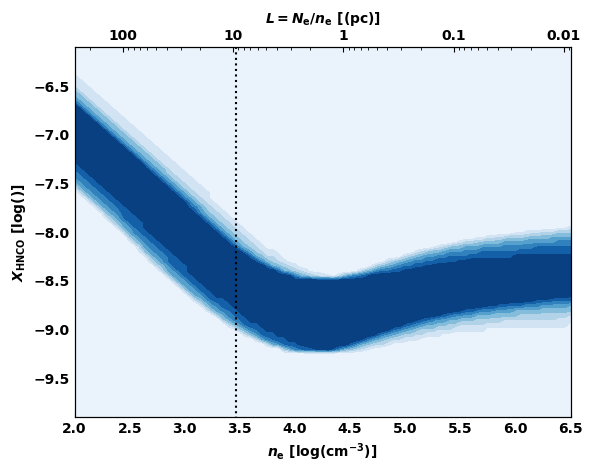

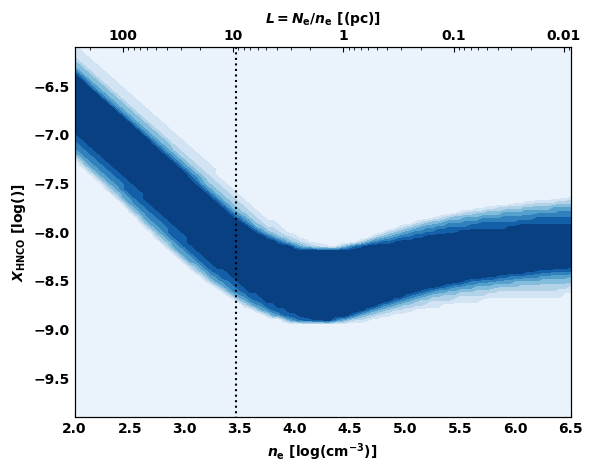

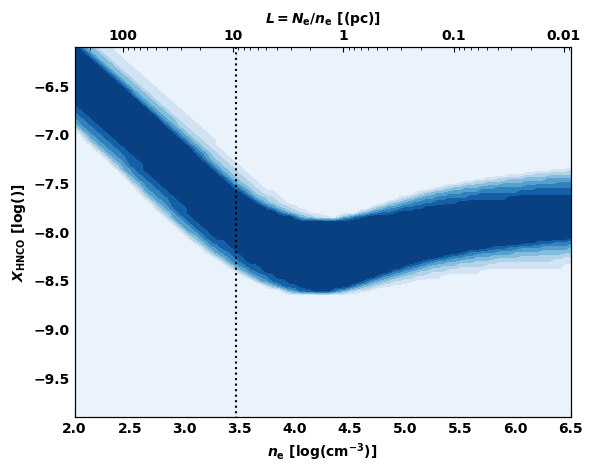

In [6]:
for linewidth in params['linewidth']:

    grid_masked = grid[grid['linewidth'] == linewidth]

    for tkin in params['tkin']:

        grid_masked_tkin = grid_masked[grid_masked['tkin'] == tkin].copy()

        if tkin == params['tkin'][0]:
            z = grid_masked_tkin['mask']
        else: 
            z+=grid_masked_tkin['mask']

    x = np.log10(grid_masked_tkin['n_h2']).quantity.value
    y = np.log10(grid_masked_tkin['X_hnco']).quantity.value
    z = z.quantity.value

    x = np.unique(x)
    y = np.unique(y)
    z = z.reshape((len(x), len(y))).T

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()

    ax1.contourf(x,y,z, cmap='Blues')

    ax1.set_xlabel("$n_\mathrm{e}$ [log(cm$^{-3})]$")
    ax1.set_ylabel("$X_\mathrm{HNCO}$ [log()]")

    ax1.set_xlim([2,6.5])
    ax1.set_ylim([-9.9,-6.1])

    def tick_function(n, N):
        L = (N/(u.cm*u.cm))/(n/(u.cm*u.cm*u.cm))
        L = L.to('pc').value
        return L

    ax2.set_xlabel("$L = N_\mathrm{e}/n_\mathrm{e}$ [(pc)]")
    new_xlim = tick_function(10**np.array(ax1.get_xlim()), N_h2)
    ax2.set_xlim(new_xlim)
    ax2.set_xscale('log')
    ax2.set_xticks([1e2, 1e1, 1, 1e-1, 1e-2])
    ax2.set_xticklabels([100, 10, 1, 0.1, 0.01])
    ax2.plot([9.4,9.4],[-11,0],'k:')
    ax1.grid(True, ls=':', alpha=0.2, zorder=-1)

    fig.savefig('./../figures/radex_grid_linewidth_%ikms.png' %linewidth, bbox_inches='tight', transparent=False)

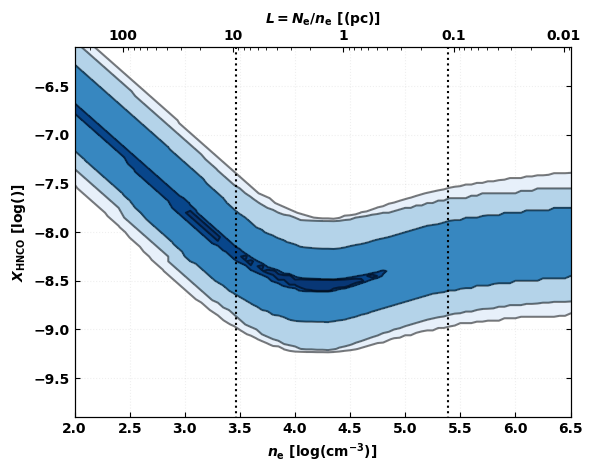

In [9]:
for linewidth in params['linewidth']:

    grid_masked = grid[grid['linewidth'] == linewidth]

    for tkin in params['tkin']:

        grid_masked_tkin = grid_masked[grid_masked['tkin'] == tkin].copy()

        if (tkin == params['tkin'][0]) & (linewidth == params['linewidth'][0]):
            z = grid_masked_tkin['mask']
        else: 
            z+=grid_masked_tkin['mask']

x = np.log10(grid_masked_tkin['n_h2']).quantity.value
y = np.log10(grid_masked_tkin['X_hnco']).quantity.value
z = z.quantity.value

x = np.unique(x)
y = np.unique(y)
z = z.reshape((len(x), len(y))).T
z = z/np.nanmax(z)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.contourf(x,y,z, cmap='Blues', levels=[0.1,0.25,0.5,0.9,0.95,1])
ax1.contour(x,y,z, colors='black', levels=[0.1,0.25,0.5,0.9,0.95,1], alpha=0.5)

ax1.set_xlabel("$n_\mathrm{e}$ [log(cm$^{-3})]$")
ax1.set_ylabel("$X_\mathrm{HNCO}$ [log()]")

ax1.set_xlim([2,6.5])
ax1.set_ylim([-9.9,-6.1])

def tick_function(n, N):
    L = (N/(u.cm*u.cm))/(n/(u.cm*u.cm*u.cm))
    L = L.to('pc').value
    return L

ax2.set_xlabel("$L = N_\mathrm{e}/n_\mathrm{e}$ [(pc)]")
new_xlim = tick_function(10**np.array(ax1.get_xlim()), N_h2)
ax2.set_xlim(new_xlim)
ax2.set_xscale('log')
ax2.set_xticks([1e2, 1e1, 1, 1e-1, 1e-2])
ax2.set_xticklabels([100, 10, 1, 0.1, 0.01])

ax2.plot([0.112,0.112],[-11,0],'k:')
ax2.plot([9.4,9.4],[-11,0],'k:')

ax1.grid(True, ls=':', alpha=0.2, zorder=-1)

fig.savefig('./../figures/radex_grid.png', bbox_inches='tight', transparent=False)

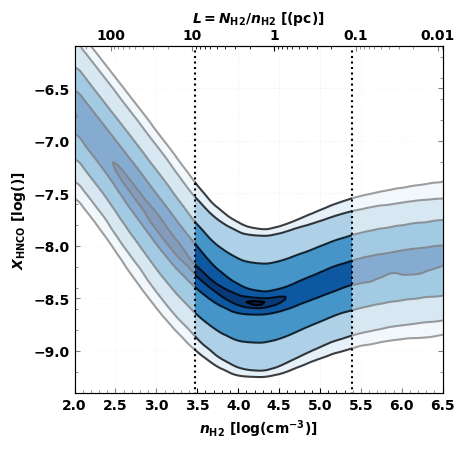

In [54]:
for linewidth in params['linewidth']:

    grid_masked = grid[grid['linewidth'] == linewidth]

    for tkin in params['tkin']:

        grid_masked_tkin = grid_masked[grid_masked['tkin'] == tkin].copy()

        if (tkin == params['tkin'][0]) & (linewidth == params['linewidth'][0]):
            z = grid_masked_tkin['mask']
        else: 
            z+=grid_masked_tkin['mask']

x = np.log10(grid_masked_tkin['n_h2']).quantity.value
y = np.log10(grid_masked_tkin['X_hnco']).quantity.value
z = z.quantity.value

x = np.unique(x)
y = np.unique(y)
z = z.reshape((len(x), len(y))).T
z = z/np.nanmax(z)

import scipy.ndimage
from scipy.ndimage.filters import gaussian_filter

x = scipy.ndimage.zoom(x, 2)
y = scipy.ndimage.zoom(y, 2)
z = scipy.ndimage.zoom(z, 2)
z = gaussian_filter(z, 2)

fig = plt.figure(figsize=(4.75,4.5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

levels=[0.1,0.25,0.5,0.75,0.9,0.95,z.max()]

ax1.contourf(x,y,z, cmap='Blues', levels=levels)
ax1.contour(x,y,z, colors='black', levels=levels, alpha=0.75)
ax1.contour(x,y,z, colors='black', levels=[0.95], alpha=1)

ax1.set_xlabel("$n_\mathrm{H2}$ [log(cm$^{-3})]$")
ax1.set_ylabel("$X_\mathrm{HNCO}$ [log()]")

ax1.set_xlim([2,6.5])
ax1.set_ylim([-9.4,-6.1])

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.2))

def tick_function(n, N):
    L = (N/(u.cm*u.cm))/(n/(u.cm*u.cm*u.cm))
    L = L.to('pc').value
    return L

ax2.set_xlabel("$L = N_\mathrm{H2}/n_\mathrm{H2}$ [(pc)]")
new_xlim = tick_function(10**np.array(ax1.get_xlim()), N_h2)
ax2.set_xlim(new_xlim)
ax2.set_xscale('log')
ax2.set_xticks([1e2, 1e1, 1, 1e-1, 1e-2])
ax2.set_xticklabels([100, 10, 1, 0.1, 0.01])

ax2.plot([0.112,0.112],[-11,0],'k:',zorder=3)
ax2.plot([9.4,9.4],[-11,0],'k:',zorder=3)

ax2.fill_between([1e4,9.4],1,-10,zorder=2,color='white',alpha=0.5,linewidth=0)
ax2.fill_between([0.112,0],1,-10,zorder=2,color='white',alpha=0.5,linewidth=0)

ax1.grid(True, ls=':', alpha=0.2, zorder=-1)

fig.savefig('./../figures/hnco_radex_grid.png', bbox_inches='tight', transparent=False)
fig.savefig('./../figures/hnco_radex_grid.pdf', bbox_inches='tight', transparent=False)

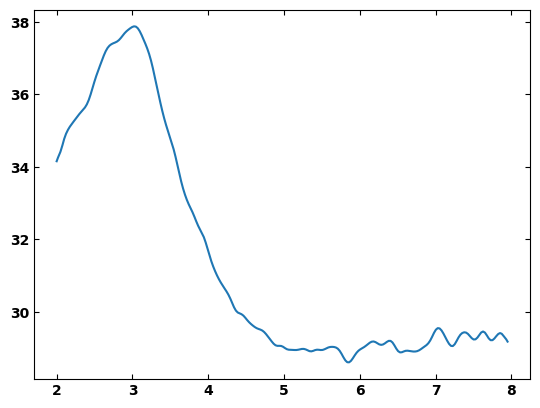

In [24]:
plt.plot(x,np.nansum(z, axis=0))

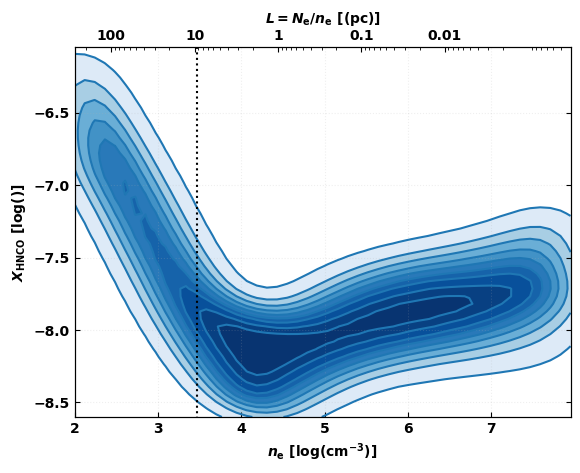

In [8]:
grid_masked = grid[grid['mask']==1]
grid_masked = grid_masked[grid_masked['linewidth'] == 20]

grid_masked['n_h2'] = np.log10(grid_masked['n_h2'])
grid_masked['X_hnco'] = np.log10(grid_masked['X_hnco'])

grid_masked.write('./../data/radex/grid_masked.csv', overwrite=True)
grid_df_masked = pd.read_csv("./../data/radex/grid_masked.csv")

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

sns.kdeplot(ax=ax1, data=grid_df_masked, x="n_h2", y="X_hnco", fill=True, cmap='Blues', gridsize=50, cut=0, levels=10, zorder=0)
sns.kdeplot(ax=ax1, data=grid_df_masked, x="n_h2", y="X_hnco", color='C0', gridsize=50, cut=0, levels=10)

ax1.set_xlabel("$n_\mathrm{e}$ [log(cm$^{-3})]$")
ax1.set_ylabel("$X_\mathrm{HNCO}$ [log()]")
ax2.set_xlabel("$L = N_\mathrm{e}/n_\mathrm{e}$ [(pc)]")

def tick_function(n, N):
    L = (N/(u.cm*u.cm))/(n/(u.cm*u.cm*u.cm))
    L = L.to('pc').value
    return ["%.2f" % z for z in L]

ax1.set_xlim([grid_masked['n_h2'].min(), grid_masked['n_h2'].max()])
ax1.set_ylim([grid_masked['X_hnco'].min(), grid_masked['X_hnco'].max()])

def tick_function(n, N):
    L = (N/(u.cm*u.cm))/(n/(u.cm*u.cm*u.cm))
    L = L.to('pc').value
    return L

# ax2.plot(range(100), np.ones(100)) # Create a dummy plot
ax2.set_xlabel("$L = N_\mathrm{e}/n_\mathrm{e}$ [(pc)]")
new_xlim = tick_function(10**np.array(ax1.get_xlim()), N_h2)
ax2.set_xlim(new_xlim)
ax2.set_xscale('log')
ax2.set_xticks([1e2, 1e1, 1, 1e-1, 1e-2])
ax2.set_xticklabels([100, 10, 1, 0.1, 0.01])

ax2.plot([9.4,9.4],[-11,0],'k:')
ax1.grid(True, ls=':', alpha=0.2, zorder=-1)

fig.savefig('./../figures/radex_grid_linewidth_%ikms.png' %linewidth, bbox_inches='tight', transparent=False)